### Przetwarzanie obrazów w dziedzinie przestrzennej
## Autorzy:
1. Jakub Rauk 256768
2. Michał Wróbel 259132
## Cwiczenie 5
Ćwiczenie polegało na przygotowaniu środowiska testowego umożliwiającego:
1. Wyświetlenie obrazu wczytanego z pliku o zadanej nazwie,
2. sporządzenie wykresów zmian poziomu szarości wzdłuż wybranej linii poziomej lub pionowej o zadanej współrzędnej,
3. Wybór podobrazu (prostokątnego obszaru) o podanych współrzędnych oraz jego zapis do pliku o zadanej nazwie.

In [34]:
import cv2 as cv
from matplotlib import pyplot as plt
from PIL import Image

Funkcje do wczytania i wyświetlenia wczytanego obrazu

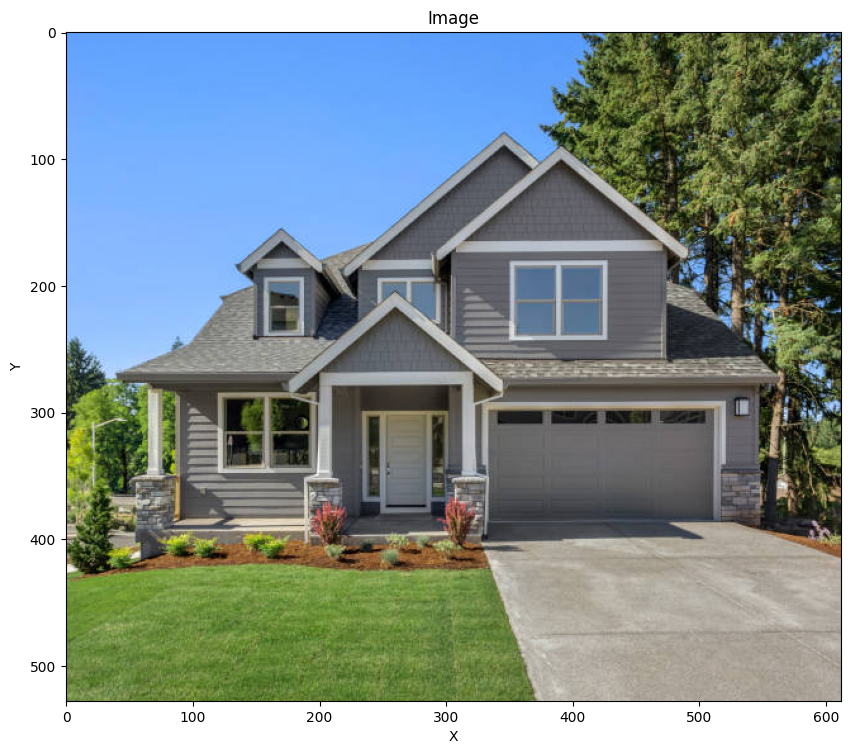

In [35]:
def load_image(file_name):
    _img = cv.imread(file_name)
    if file_name.split('.')[1] == 'jpg':
        _img = cv.cvtColor(_img, cv.COLOR_BGR2RGB)
    return _img

def display_image(image):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))
    ax.imshow(image)
    ax.set_title('Image')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

filename = input("Enter image file name: ")
image = load_image(filename)
display_image(image)


Wygenerowanie histogramu oraz wykresu zmian poziomu szarości wzdłuż wybranej linii poziomej lub pionowej o zadanej współrzędnej

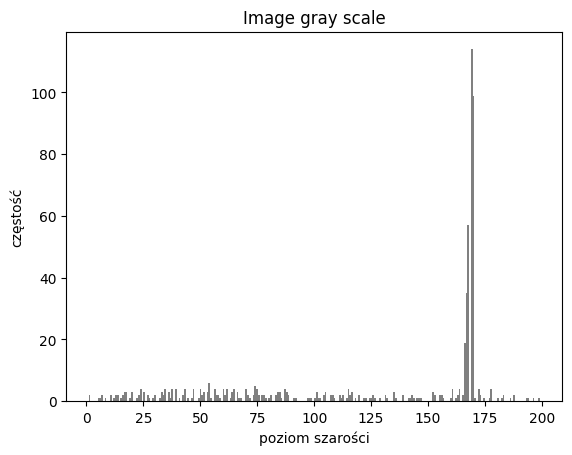

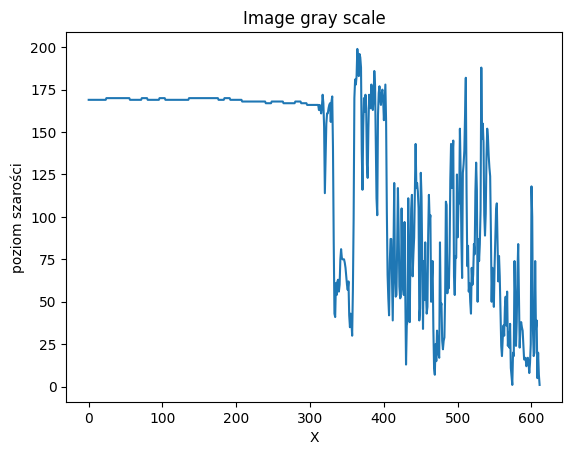

In [36]:
def hist_image_grayscale(image, line_type, coordinate):
    gray_scale_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    height, width = gray_scale_image.shape

    if line_type == 'horizontal':
        if coordinate < 0 or coordinate >= height:
            print('Invalid horizontal coordinate')
            return
        line = gray_scale_image[coordinate, :]
    elif line_type == 'vertical':
        if coordinate < 0 or coordinate >= width:
            print('Invalid vertical coordinate')
            return
        line = gray_scale_image[:, coordinate]
    else:
        print('Invalid line_type, valid are: vertical, horizontal')

    plt.hist(line, bins=256, color='gray')
    plt.xlabel('poziom szarości')
    plt.ylabel('częstość')
    plt.title('Image gray scale')
    plt.show()

def plot_image_grayscale(image, line_type, coordinate):
    gray_scale_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    height, width = gray_scale_image.shape

    if line_type == 'horizontal':
        if coordinate < 0 or coordinate >= height:
            print('Invalid horizontal coordinate')
            return
        line = gray_scale_image[coordinate, :]
    elif line_type == 'vertical':
        if coordinate < 0 or coordinate >= width:
            print('Invalid vertical coordinate')
            return
        line = gray_scale_image[:, coordinate]
    else:
        print('Invalid line_type, valid are: vertical, horizontal')

    plt.plot(line)
    plt.xlabel('X')
    plt.ylabel('poziom szarości')
    plt.title('Image gray scale')
    plt.show()


hist_image_grayscale(image, 'horizontal', 50)
plot_image_grayscale(image, 'horizontal', 50)

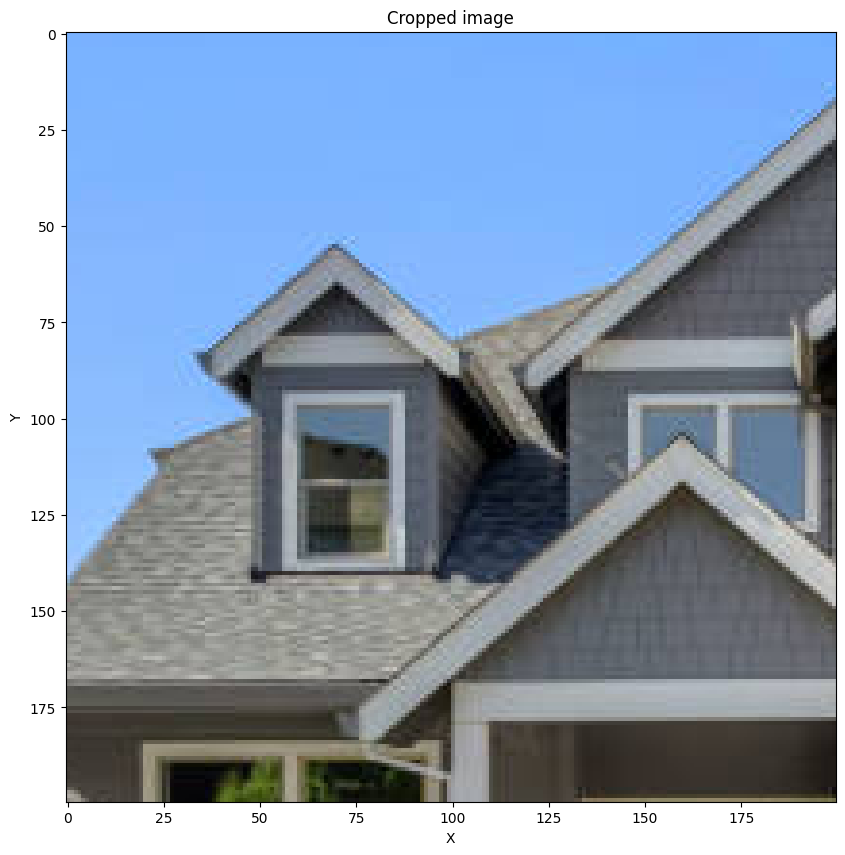

In [52]:
def crop_image(img, first_point, second_point):
    # points should be: list[x, y]
    cropped_img = img[first_point[1]:second_point[1], first_point[0]:second_point[0]]
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
    ax.imshow(cropped_img)
    ax.set_title('Cropped image')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()
    return cropped_img

def save_image(file_name, img):
    if file_name.split('.')[1] in ['jpg', 'png']:
        img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
    cv.imwrite(file_name, img)

# first_point = [int(a) for a in input("Enter first_point coordinates (eg. 50,50): ").split(',')]
# second_point = [int(a) for a in input("Enter first_point coordinates (eg. 50,50): ").split(',')]

cropped_image = crop_image(image, [100, 100], [300, 300])
save_image('wycinek.png', cropped_image)
